# **Exploratory data analysis** 

In [64]:
import pandas as pd
import os

In [ ]:
current_directory = os.getcwd()
file_path = os.path.join(current_directory, "data/Customer_Churn_Data_Large.xlsx")


**Loading all the sheets**

In [66]:
customer_demographics = pd.read_excel(file_path, sheet_name="Customer_Demographics")
customer_demographics.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [67]:
customer_demographics.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


In [68]:
Transaction_History = pd.read_excel(file_path, sheet_name="Transaction_History")
Transaction_History.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [69]:
Customer_Service = pd.read_excel(file_path, sheet_name="Customer_Service")
Customer_Service.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [70]:
Online_Activity = pd.read_excel(file_path, sheet_name="Online_Activity")
Online_Activity.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [71]:
Churn_Status = pd.read_excel(file_path, sheet_name="Churn_Status")
Churn_Status.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


**Merging all sheets into 1**

In [72]:
df = customer_demographics.merge(Transaction_History, on="CustomerID", how="left") \
    .merge(Customer_Service, on="CustomerID", how="left") \
    .merge(Online_Activity, on="CustomerID", how="left") \
    .merge(Churn_Status, on="CustomerID", how="left")

df.head()
 

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [73]:
age_bins = list(range(15, 75, 5)) 
print(age_bins)
age_labels = [f"{i}-{i+5}" for i in age_bins[:-1]] 

df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]


In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [75]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory',
       'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage',
       'ChurnStatus', 'AgeRange'],
      dtype='object')

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

for column in list(df.columns):
    if df[column].dtype == 'category' or column == 'IncomeLevel':
        oe = OrdinalEncoder()
        df[column] = oe.fit_transform(df[[column]])

    elif df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    
df.head(10)        


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,AgeRange
0,1,62,1,2,1.0,7194,2022-03-27,416.50,2,6363.0,2022-03-31,2,0,2023-10-21,34,0,0,9.0
1,2,65,1,1,1.0,7250,2022-08-08,54.96,1,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
2,2,65,1,1,1.0,9660,2022-07-25,197.50,2,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
3,2,65,1,1,1.0,2998,2022-01-25,101.31,3,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
4,2,65,1,1,1.0,1228,2022-07-24,397.37,1,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
5,2,65,1,1,1.0,8903,2022-01-09,285.21,2,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
6,2,65,1,1,1.0,3527,2022-09-16,311.34,2,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
7,2,65,1,1,1.0,9279,2022-11-19,199.73,4,3329.0,2022-03-17,2,0,2023-12-05,5,2,1,10.0
8,3,18,1,2,1.0,9839,2022-10-08,241.06,0,9976.0,2022-08-24,2,0,2023-11-15,3,2,0,0.0
9,3,18,1,2,1.0,7364,2022-08-15,51.07,1,9976.0,2022-08-24,2,0,2023-11-15,3,2,0,0.0


In [77]:
df.CustomerID.unique().shape[0] 

1000

In [78]:
df_final = df.drop(['TransactionID', 'InteractionID', 'TransactionDate', 'InteractionDate', 'LastLoginDate'], axis=1)


/tmp/ipykernel_4098/55282053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ChurnStatus", data=df, palette="Set2")


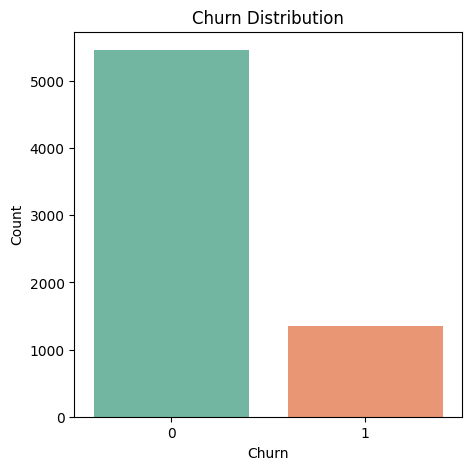

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5)) 
sns.countplot(x="ChurnStatus", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

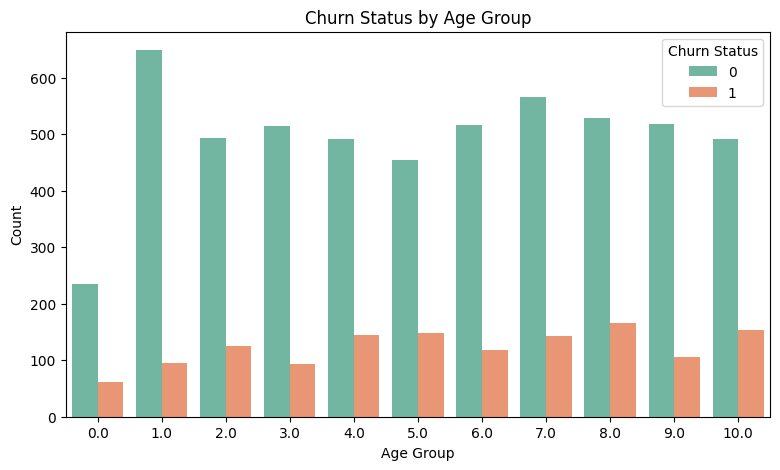

In [80]:
# display churn status vs Age group, Gender, IncomeLevel

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="AgeRange", hue="ChurnStatus", data=df, palette="Set2")
plt.title("Churn Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.show()  



/tmp/ipykernel_4098/1563445373.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChurnStatus', y='TotalAmountSpent', data=total_amount_spent, palette="Set2")


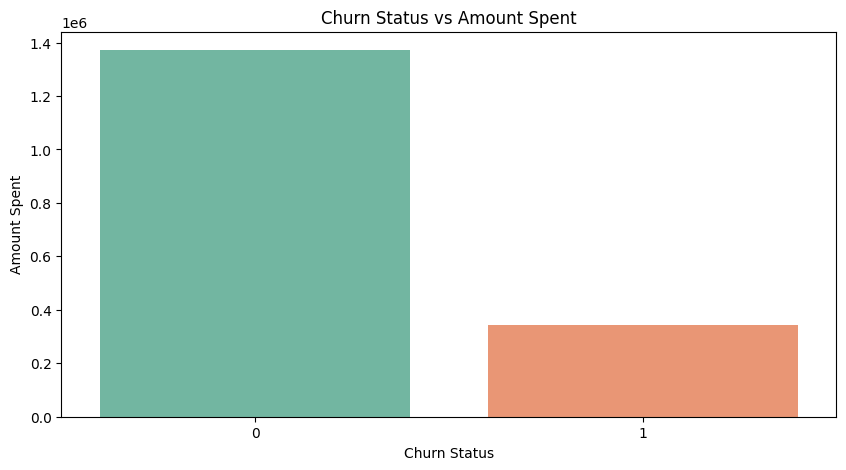

In [81]:
# churn status vs transactions total amountspent

total_amount_spent = df.groupby('ChurnStatus')['AmountSpent'].sum().reset_index()
total_amount_spent.columns = ['ChurnStatus', 'TotalAmountSpent']

plt.figure(figsize=(10, 5))
sns.barplot(x='ChurnStatus', y='TotalAmountSpent', data=total_amount_spent, palette="Set2")
plt.title("Churn Status vs Amount Spent")   
plt.xlabel("Churn Status")
plt.ylabel("Amount Spent")
plt.show()


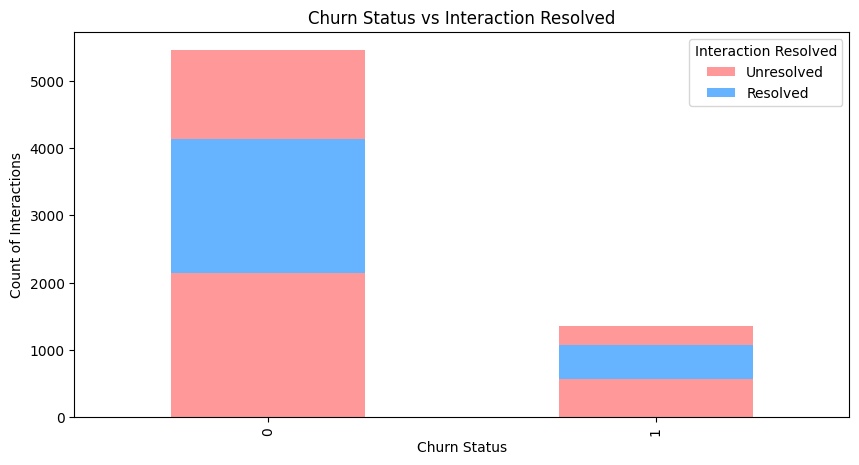

In [82]:
# Count of unresolved/resolved interactions vs. Churn
un_status_counts = df.groupby(['ChurnStatus', 'ResolutionStatus']).size().unstack().fillna(0)
un_status_counts.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#FF9999', '#66B3FF'])
plt.title("Churn Status vs Interaction Resolved")
plt.xlabel("Churn Status")
plt.ylabel("Count of Interactions")
plt.legend(title="Interaction Resolved", labels=['Unresolved', 'Resolved'])
plt.show()


/tmp/ipykernel_4098/3809262752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y='InteractionCount', data=merged , palette="Set2")


Text(0.5, 1.0, 'Number of Interactions vs Churn')

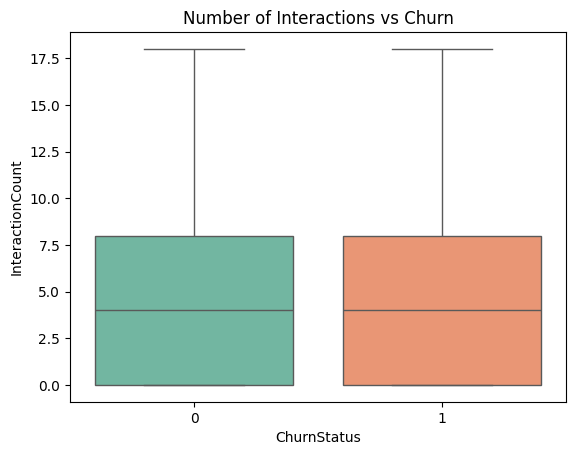

In [83]:
interactions_per_customer = df.groupby('CustomerID')['InteractionID'].count().reset_index(name='InteractionCount')
merged = df.drop_duplicates('CustomerID').merge(interactions_per_customer, on='CustomerID', how='left')
sns.boxplot(x='ChurnStatus', y='InteractionCount', data=merged , palette="Set2")
plt.title('Number of Interactions vs Churn')


Text(0.5, 1.0, 'Churn by Service Usage')

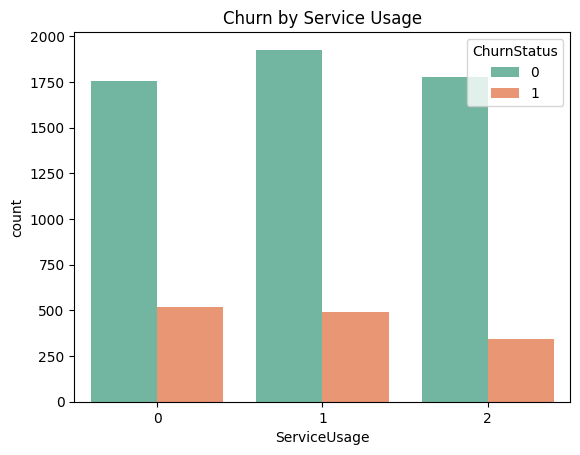

In [84]:
sns.countplot(x='ServiceUsage', hue='ChurnStatus', data=df , palette="Set2")
plt.title('Churn by Service Usage')


/tmp/ipykernel_4098/530589883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnStatus', y='DaysSinceLastLogin', data=df    , palette="Set2")


Text(0.5, 1.0, 'Recency of Last Login vs Churn')

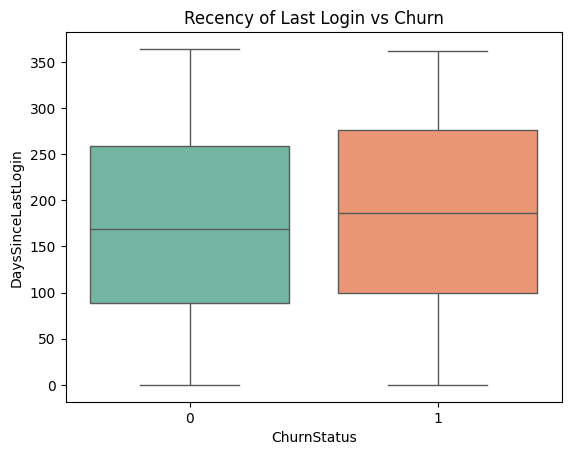

In [85]:
df['DaysSinceLastLogin'] = (df['LastLoginDate'].max() - df['LastLoginDate']).dt.days
sns.boxplot(x='ChurnStatus', y='DaysSinceLastLogin', data=df    , palette="Set2")
plt.title('Recency of Last Login vs Churn')


<Axes: title={'center': 'Churn Rate by Income Level'}, xlabel='IncomeLevel'>

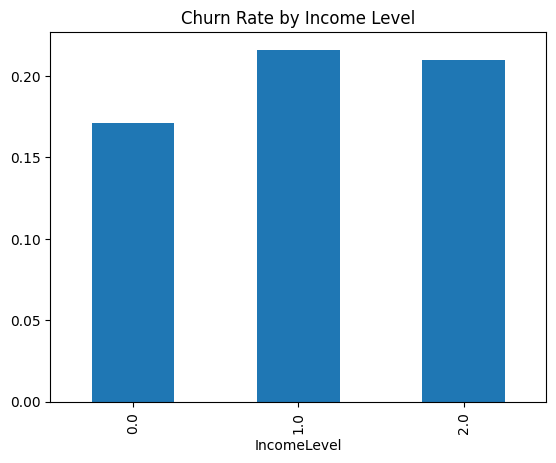

In [86]:
churn_rate = df.groupby('IncomeLevel')['ChurnStatus'].mean()
churn_rate.plot(kind='bar', title='Churn Rate by Income Level')


Text(0.5, 1.0, 'Correlation Heatmap')

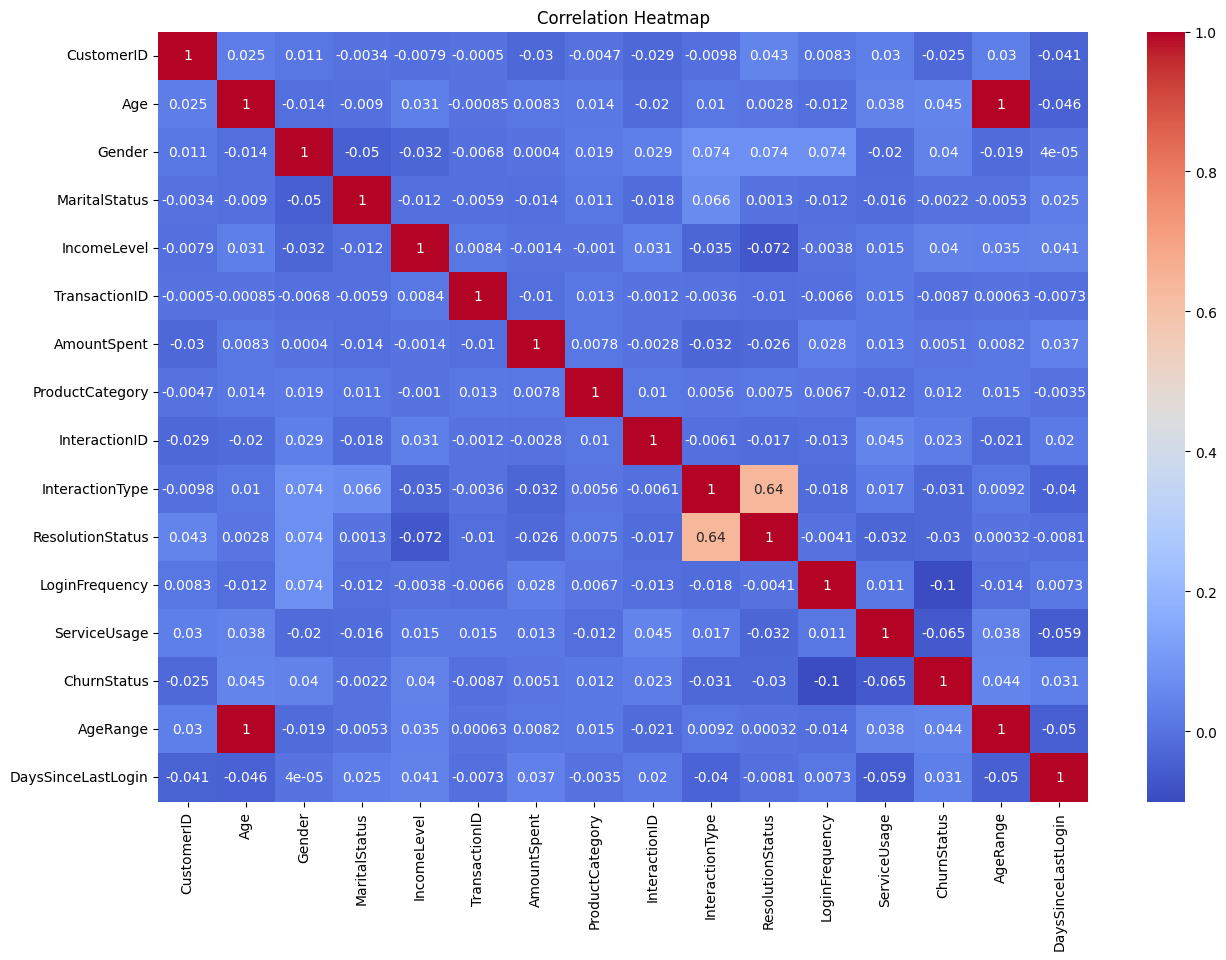

In [87]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')


Text(0.5, 1.0, 'Outliers in AmountSpent')

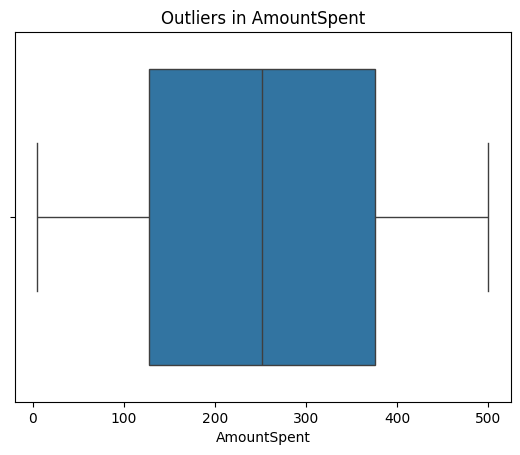

In [88]:
sns.boxplot(x=df['AmountSpent'])
plt.title("Outliers in AmountSpent")